In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
datapath = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file("flower_photos", origin = datapath, cache_dir = "/content/drive/MyDrive/AIDS dataset" , untar = True)







In [ ]:
data_dir = pathlib.Path(data_dir)

In [ ]:
data_dir

PosixPath('/content/drive/MyDrive/AIDS dataset/datasets/flower_photos')

In [ ]:
data = len(list(data_dir.glob("*/*.jpg")))

In [ ]:
data

3670

In [ ]:
tulips = list(data_dir.glob("tulips/*.jpg"))

In [ ]:
tulips[0]

PosixPath('/content/drive/MyDrive/AIDS dataset/datasets/flower_photos/tulips/17165583356_38cb1f231d_n.jpg')

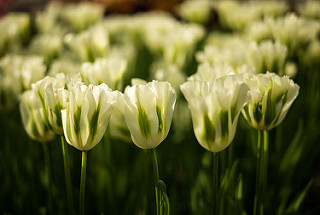

In [ ]:
img = cv2.imread(str(tulips[0]), 1)
cv2_imshow(img)

In [ ]:
flower_data = {
    "tulips" : list(data_dir.glob("tulips/*.jpg")),
    "sunflowers" : list(data_dir.glob("sunflowers/*.jpg")),
    "roses" : list(data_dir.glob("roses/*.jpg")),
    "daisy" : list(data_dir.glob("daisy/*.jpg")),
    "dandelion" : list(data_dir.glob("dandelion/*.jpg"))
}

In [ ]:
flower_label = {
    "tulips" : 0,
    "sunflowers" : 1,
    "roses" : 2,
    "daisy" : 3,
    "dandelion" : 4
}

In [ ]:
X = []
y = []

for flower, images in flower_data.items():
  print(flower)
  print(len(images))
  for i in images:
    img = cv2.imread(str(i), 1)
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flower_label[flower])

tulips
799
sunflowers
699
roses
641
daisy
633
dandelion
898


In [ ]:
X = np.array(X)
y = np.array(y)


In [ ]:
X_flower = X
y_flower = y

In [ ]:
np.save("X_flower.npy", X_flower)
np.save("y_flower.npy", y_flower)

In [ ]:
ab = cv2.resize(X[1], (224, 224))

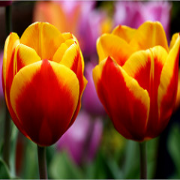

In [ ]:
cv2_imshow(X[1])

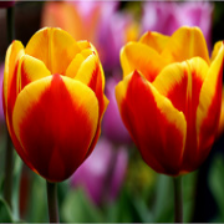

In [ ]:
cv2_imshow(ab)

In [ ]:
ab.shape

(224, 224, 3)

In [ ]:
X_flower.shape, X_flower.shape

((3670, 180, 180, 3), (3670, 180, 180, 3))

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(100, (2,2), strides = (1, 1), input_shape = (180, 180, 3), activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(100, (2,2), strides = (1, 1), activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(100, (2,2), strides = (1, 1), activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(5, activation = "softmax"),
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 11s 60ms/step - loss: 1.2608 - accuracy: 0.4604
Epoch 2/5
86/86 [==============================] - 5s 61ms/step - loss: 0.9828 - accuracy: 0.6148
Epoch 3/5
86/86 [==============================] - 5s 61ms/step - loss: 0.8063 - accuracy: 0.6919
Epoch 4/5
86/86 [==============================] - 5s 61ms/step - loss: 0.5852 - accuracy: 0.7747
Epoch 5/5
86/86 [==============================] - 5s 63ms/step - loss: 0.3841 - accuracy: 0.8572


In [ ]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 1s 21ms/step - loss: 1.2423 - accuracy: 0.6351


[1.242334246635437, 0.6350762248039246]

In [ ]:
data_augment= keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (180,180,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.4)
])

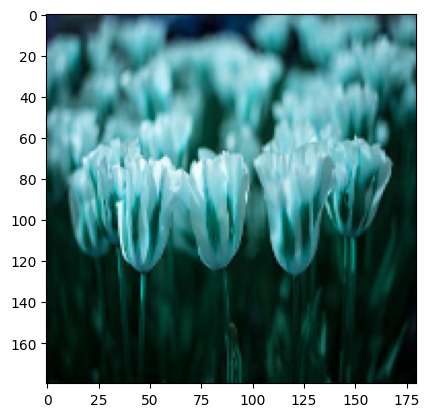

In [ ]:
plt.imshow(X[0])

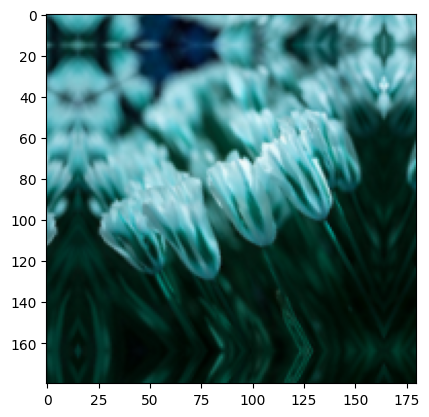

In [ ]:
plt.imshow(data_augment(X)[0].numpy().astype("uint8"))

In [ ]:
model_aug = keras.Sequential([
    data_augment,
    keras.layers.Conv2D(100, (2,2), strides = (1, 1), input_shape = (180, 180, 3), activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(100, (2,2), strides = (1, 1), activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(100, (2,2), strides = (1, 1), activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(5, activation = "softmax"),
])

model_aug.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
model_aug.fit(X_train, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 7s 63ms/step - loss: 1.3333 - accuracy: 0.4041
Epoch 2/5
86/86 [==============================] - 5s 62ms/step - loss: 1.1059 - accuracy: 0.5447
Epoch 3/5
86/86 [==============================] - 5s 61ms/step - loss: 1.0314 - accuracy: 0.5810
Epoch 4/5
86/86 [==============================] - 5s 64ms/step - loss: 0.9778 - accuracy: 0.6112
Epoch 5/5
86/86 [==============================] - 5s 61ms/step - loss: 0.9003 - accuracy: 0.6406


In [ ]:


model_aug.evaluate(X_test, y_test)


29/29 [==============================] - 1s 33ms/step - loss: 0.9703 - accuracy: 0.6285


[0.970261812210083, 0.6285402774810791]

In [ ]:


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 179, 179, 100)     1300      
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 100)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 100)       40100     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 44, 44, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 43, 100)       40100     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 21, 21, 100)       0